In [1]:
from prophet import Prophet

import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [7]:
df = pd.read_json('sample/product-001.json')
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype(float)

10:12:58 - cmdstanpy - INFO - Chain [1] start processing
10:12:58 - cmdstanpy - INFO - Chain [1] done processing


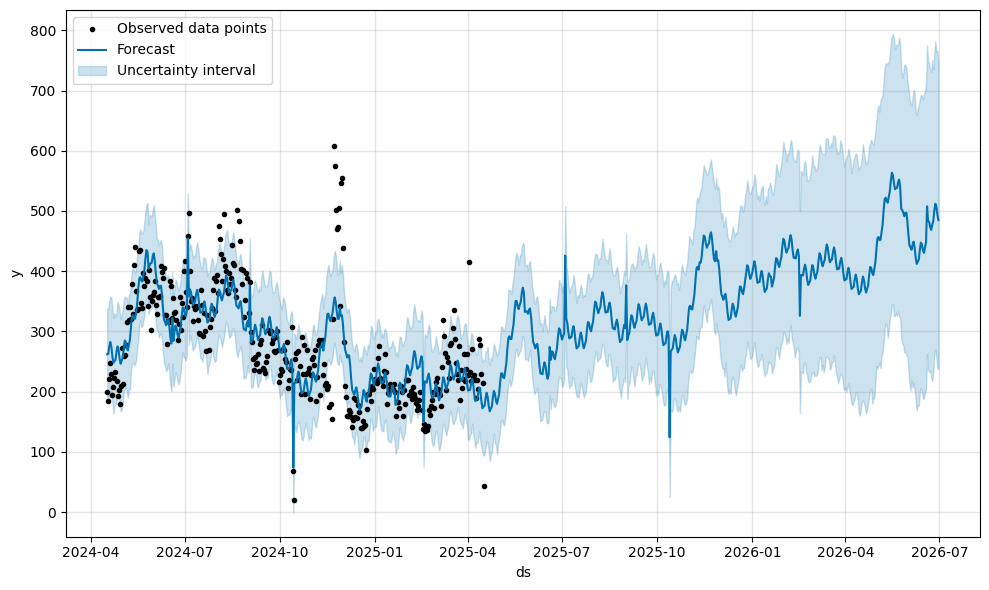

In [25]:
periods = 440

m = Prophet()
# m.add_seasonality(name='quarter', period=90, fourier_order=5, mode='additive')
m.add_seasonality(name='half', period=180, fourier_order=5, mode='additive')
m.add_country_holidays(country_name='US')
m.fit(df)

future = m.make_future_dataframe(periods=periods)
forecast = m.predict(future)
fig1 = m.plot(forecast, include_legend=True)

<Axes: title={'center': 'Forecast vs Actuals'}, xlabel='ds'>

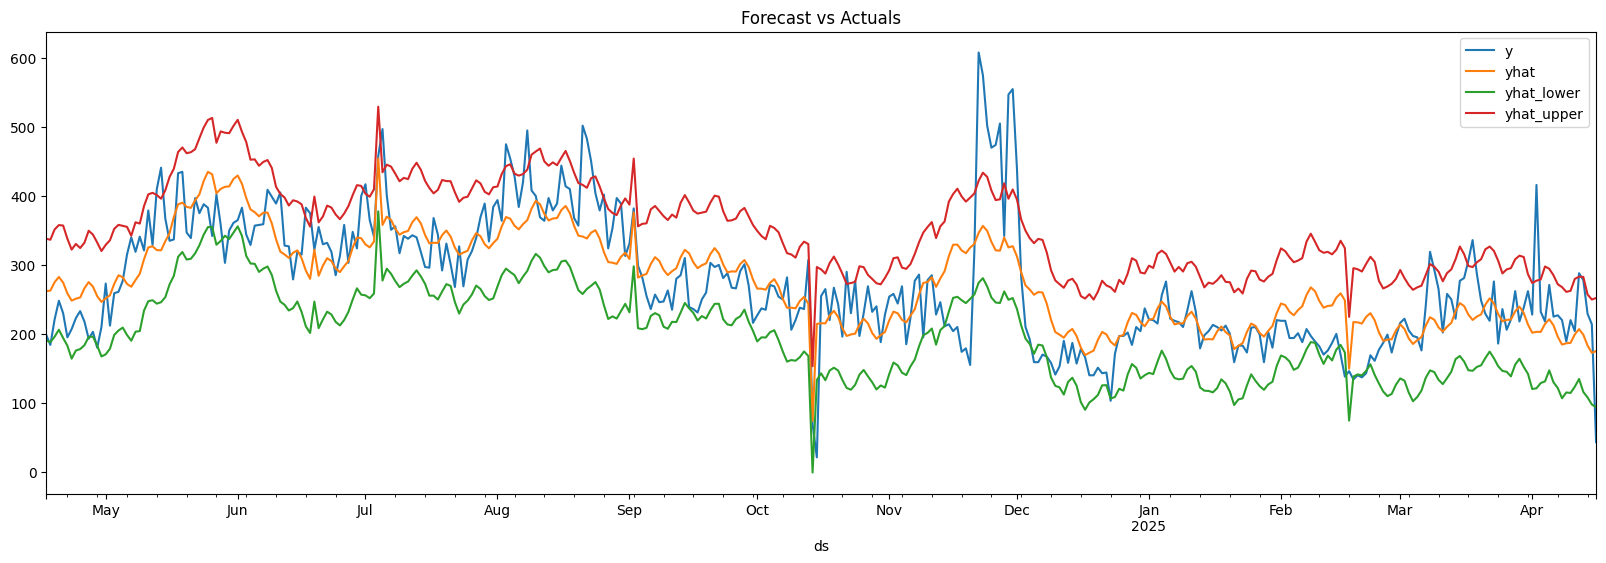

In [26]:
df_combined = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
df_combined.plot(x='ds', y=['y', 'yhat', 'yhat_lower', 'yhat_upper'], figsize=(20, 6), title='Forecast vs Actuals')

In [27]:
accuracy = 100 - (abs(df_combined['y'] - df_combined['yhat']).sum() / df_combined['y'].sum() * 100)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 84.46%
